# Importing Libraries

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Loading

In [65]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [66]:
df.head() #to display first 5 rows of dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [67]:
df.tail() #to display last 5 rows of dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


# Data Preprocessing

In [68]:
df.shape #to display the rows and columns of dataset

(100000, 9)

In [69]:
df.isnull().sum() #to count the number of missing (NaN or null) values in each column of a Dataset.

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [70]:
df.info() #to provide a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [71]:
df = df.astype({'age': int}) #to change the 'age' column from object type to integer data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int32  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 6.5+ MB


In [72]:
#encoding categorical variables with nominal values into numerical values.
map_name={'Male':1,'Female':2,'Other':3} 
df['gender']=df['gender'].map(map_name)
print(df)

       gender  age  hypertension  heart_disease smoking_history    bmi  \
0           2   80             0              1           never  25.19   
1           2   54             0              0         No Info  27.32   
2           1   28             0              0           never  27.32   
3           2   36             0              0         current  23.45   
4           1   76             1              1         current  20.14   
...       ...  ...           ...            ...             ...    ...   
99995       2   80             0              0         No Info  27.32   
99996       2    2             0              0         No Info  17.37   
99997       1   66             0              0          former  27.83   
99998       2   24             0              0           never  35.42   
99999       2   57             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1      

In [73]:
# to encode the "smoking_history" column in a DataFrame (df) into numerical values as:
# No Info=0, current=1, ever=2, former=3, never=4, not current=5

from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
labels = encoder.fit_transform(df.smoking_history)
df['encoder_smoking_history'] = labels
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,encoder_smoking_history
0,2,80,0,1,never,25.19,6.6,140,0,4
1,2,54,0,0,No Info,27.32,6.6,80,0,0
2,1,28,0,0,never,27.32,5.7,158,0,4
3,2,36,0,0,current,23.45,5.0,155,0,1
4,1,76,1,1,current,20.14,4.8,155,0,1
...,...,...,...,...,...,...,...,...,...,...
99995,2,80,0,0,No Info,27.32,6.2,90,0,0
99996,2,2,0,0,No Info,17.37,6.5,100,0,0
99997,1,66,0,0,former,27.83,5.7,155,0,3
99998,2,24,0,0,never,35.42,4.0,100,0,4


In [74]:
df2 = df.drop(['smoking_history'], axis=1) #removing the original 'smoking_history'
print(df2)

       gender  age  hypertension  heart_disease    bmi  HbA1c_level  \
0           2   80             0              1  25.19          6.6   
1           2   54             0              0  27.32          6.6   
2           1   28             0              0  27.32          5.7   
3           2   36             0              0  23.45          5.0   
4           1   76             1              1  20.14          4.8   
...       ...  ...           ...            ...    ...          ...   
99995       2   80             0              0  27.32          6.2   
99996       2    2             0              0  17.37          6.5   
99997       1   66             0              0  27.83          5.7   
99998       2   24             0              0  35.42          4.0   
99999       2   57             0              0  22.43          6.6   

       blood_glucose_level  diabetes  encoder_smoking_history  
0                      140         0                        4  
1                  

In [75]:
df2['diabetes'].value_counts()   # to count the number of occurrences of each unique value in the 'diabetes' column

diabetes
0    91500
1     8500
Name: count, dtype: int64

# Understanding Dataset

In [76]:
df2.describe() # to generate various summary statistics of the numerical columns in a DataFrame.

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,encoder_smoking_history
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.585880,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000,2.179650
std,0.492937,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883,1.889659
min,1.000000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000000
25%,1.000000,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000,0.000000
50%,2.000000,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000,3.000000
75%,2.000000,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000,4.000000
max,3.000000,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000,5.000000


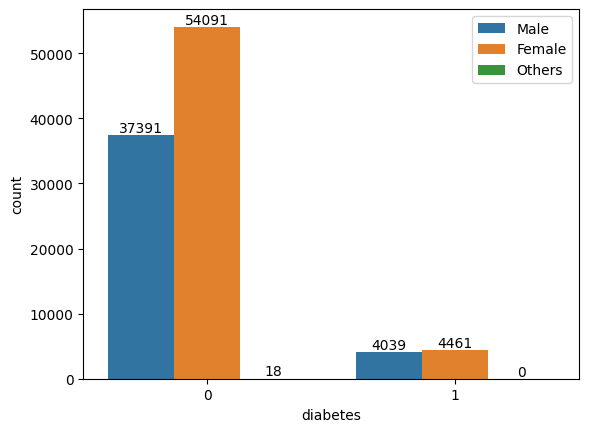

In [77]:
# to create a countplot with Seaborn and label the bars with counts 
gen=sns.countplot(x='diabetes',data=df2,hue='gender')

for bars in gen.containers:
    gen.bar_label(bars,label_type='edge')
    
plt.legend(["Male", "Female" , "Others"],  loc ="upper right")

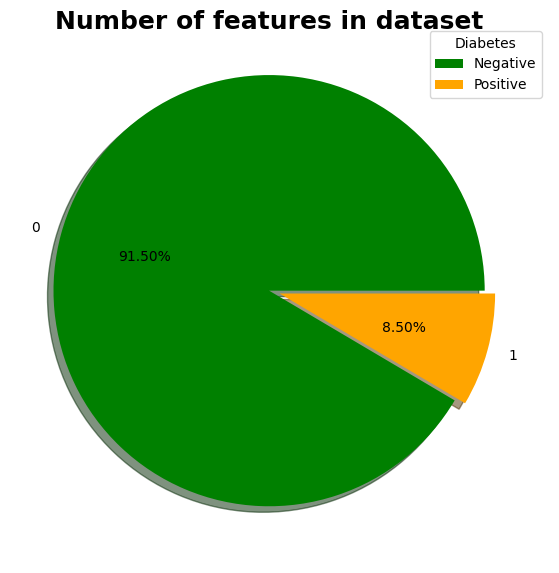

In [78]:
# to create a pie chart to visualize the distribution of diabetes labels (0 for negative and 1 for positive)using Matplotlib.
labels = [0, 1]
size = df2['diabetes'].value_counts()
colors = [ 'green', 'orange']
explode = [0.05, 0]
plt.figure(figsize=(8,7))
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.suptitle("Number of features in dataset", y=0.9, size=18,weight="bold")
plt.legend(["Negative", "Positive"],  title="Diabetes")
plt.show()

# Exploratory Data Analysis (EDA) to check the correlation between features.

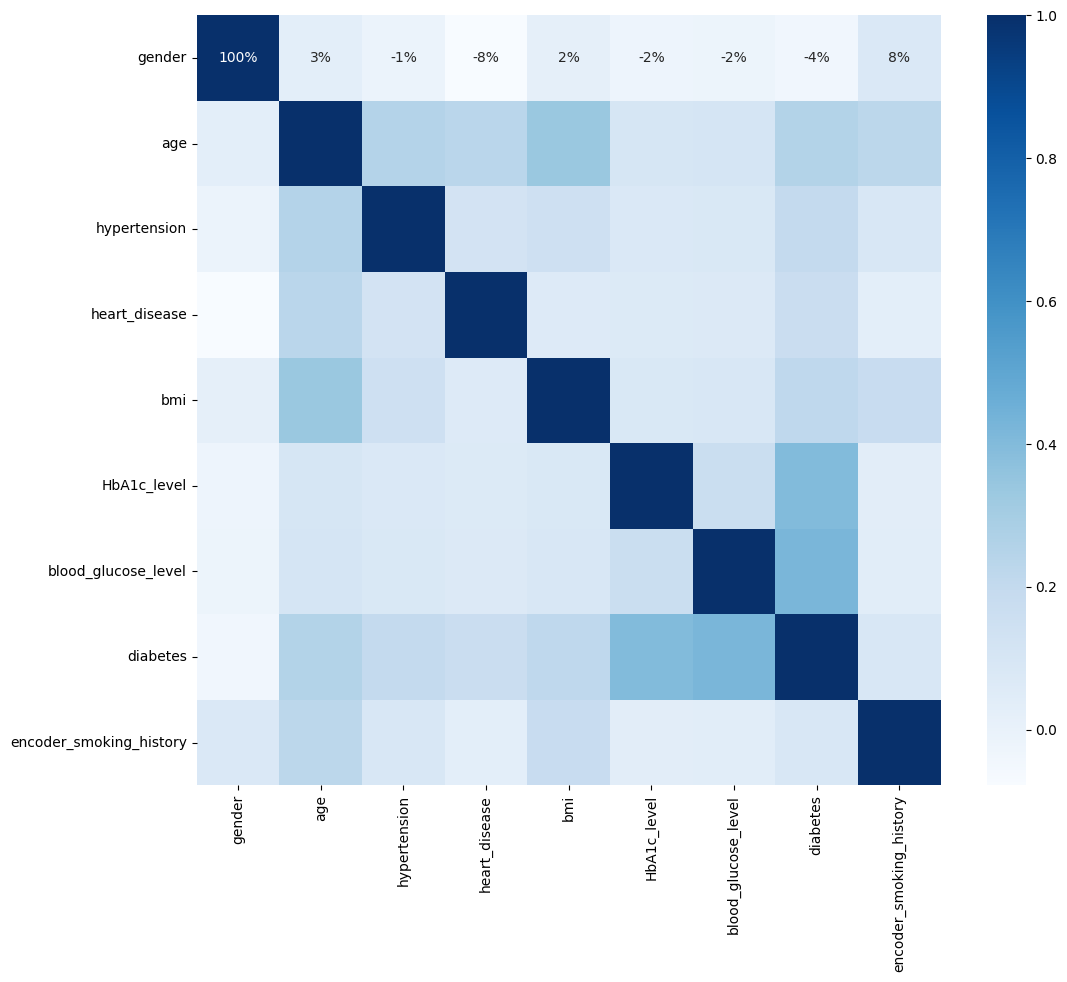

In [79]:
# creating a heatmap of the correlation matrix using Seaborn and Matplotlib.
axis = plt.figure(figsize=(12,10))
sns.heatmap(df2.corr() , annot= True , cmap = "Blues" , fmt=".0%")
plt.show()

# OverSampling

In [80]:
from imblearn.over_sampling import SMOTE
# Split the data into training and testing sets
X = df2.drop(columns=['diabetes'])  # Features
y = df2['diabetes']  # Target variable

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Feature Scaling

In [81]:
# Saving the feature matrix X into CSV format on local drive
file_path ='C:/Users/prath/OneDrive/Desktop/Diabetes/output.csv'
X_balanced.to_csv(file_path, index=False)

In [82]:
# splitting dataset into training and testing sets.
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [83]:
# StandardScaler standardize feature ensuring they have a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Classification

In [84]:
from sklearn.metrics import confusion_matrix ,classification_report, accuracy_score

In [85]:
# evaluating different ML models and store their accuracy scores and names in a list

acc=[]
model_name=['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbor', 'Voting Classifier']

# Logistic Regression

In [86]:
# creating LogisticRegression model having specific parameters :
# multinomial: handle multiple class prediction problems
# saga: Stochastic Average Gradient Descent,iteratively update model weights during training.

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)
model.fit(X_train, Y_train.values.ravel())

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

In [87]:
# to make predictions on the test dataset
y_pred=model.predict(X_test)

In [88]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_lr=accuracy_score(Y_test,y_pred)
acc.append(acc_lr)
acc_lr

0.8934972677595628

In [89]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[16294  1999]
 [ 1899 16408]]


In [90]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89     18293
           1       0.89      0.90      0.89     18307

    accuracy                           0.89     36600
   macro avg       0.89      0.89      0.89     36600
weighted avg       0.89      0.89      0.89     36600



# Decision Tree Classifier

In [91]:
# creating DecisionTreeClassifier having parameter: 'gini' measures impurity by Gini index, splite nodes to minimize class impurity 

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='gini',max_depth=1000)
clf.fit(X_train, Y_train.values.ravel())

DecisionTreeClassifier(max_depth=1000)

In [92]:
# to make predictions on the test dataset
y_pred=clf.predict(X_test)

In [93]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[17692   601]
 [  477 17830]]


In [94]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_decisionT=accuracy_score(Y_test,y_pred)
acc.append(acc_decisionT)
acc_decisionT

0.9705464480874317

In [95]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18293
           1       0.97      0.97      0.97     18307

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600



# Random Forest Classifier

In [96]:
# creating random forest classifier model consist of 20 decision trees(n_estimators) and measure of impurity in dataset(gini). 

from sklearn.ensemble import RandomForestClassifier
cl_random=RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=1000)
cl_random.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(max_depth=1000, n_estimators=20)

In [97]:
# to make predictions on the test dataset
y_pred=cl_random.predict(X_test)

In [98]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[17792   501]
 [  583 17724]]


In [99]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_rfc=accuracy_score(Y_test,y_pred)
acc.append(acc_rfc)
acc_rfc

0.9703825136612022

In [100]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18293
           1       0.97      0.97      0.97     18307

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600



# K Nearest Neighbors

In [101]:
# creating a k nearsest neighbors model such that the number of neighbors to consider when making predictions is k = 5.

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train.values.ravel())

KNeighborsClassifier()

In [102]:
# to make the predictions
y_pred=knn.predict(X_test)

In [103]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[16724  1569]
 [  758 17549]]


In [104]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_knn=accuracy_score(Y_test,y_pred)
acc.append(acc_knn)
acc_knn

0.9364207650273224

In [105]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     18293
           1       0.92      0.96      0.94     18307

    accuracy                           0.94     36600
   macro avg       0.94      0.94      0.94     36600
weighted avg       0.94      0.94      0.94     36600



# Enemble Learning: Voting Classifier

In [106]:
# create an ensemble model that combines the predictions of several individual classifiers(Random Forest, Decision Tree, Naive Bayes, K Nearest Neighbors, Perceptron, Logistic Regression)
# such that the class label with the most votes will be the final prediction (voting='hard')

from sklearn.ensemble import VotingClassifier
classifier=VotingClassifier(estimators=[('Random Forest',cl_random),('Decision Tree',clf),('K Nearest Neighbors',knn),("Logistic Regression",model )], voting='hard',weights=[1,1,1,1])
classifier.fit(X_train,Y_train.values.ravel())

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(max_depth=1000,
                                                     n_estimators=20)),
                             ('Decision Tree',
                              DecisionTreeClassifier(max_depth=1000)),
                             ('K Nearest Neighbors', KNeighborsClassifier()),
                             ('Logistic Regression',
                              LogisticRegression(max_iter=1000,
                                                 multi_class='multinomial',
                                                 solver='saga'))],
                 weights=[1, 1, 1, 1])

In [107]:
# to make the predictions
y_pred=classifier.predict(X_test)

In [108]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[17814   479]
 [  782 17525]]


In [109]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_vc=accuracy_score(Y_test,y_pred)
acc.append(acc_vc)
acc_vc

0.9655464480874317

In [110]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     18293
           1       0.97      0.96      0.97     18307

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600



# Comparison Of Classification Models Based On Their Accuracy Scores

In [111]:
print(acc)

[0.8934972677595628, 0.9705464480874317, 0.9703825136612022, 0.9364207650273224, 0.9655464480874317]


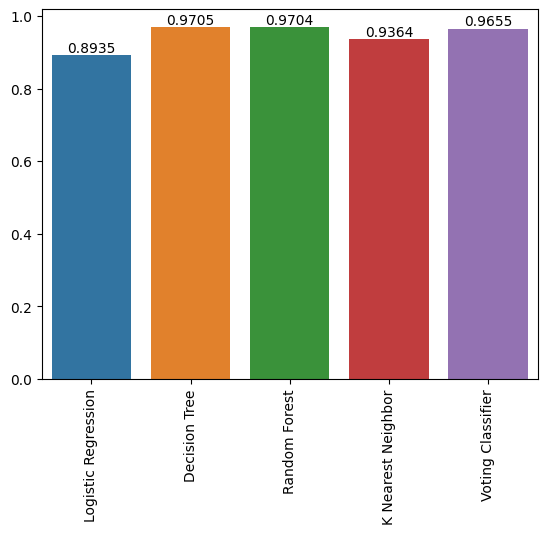

In [112]:
# to create a bar plot to visualize the accuracy scores of different machine learning models
ax = sns.barplot(x=model_name, y=acc)
for i, height in enumerate(acc):
    ax.text(i, height, f'{acc[i]:.4f}',ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()

# Making a prediction from the model

In [113]:
# input_data=(gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smokinghistory(never))
# 2  4
input_data1=("Female"	,66	,1	,0	,27.19,	4.8	,85,"never")
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data1)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

df = pd.DataFrame(input_data_reshaped)

map_name={'Male':1,'Female':2,'Other':3} 
df[0]=df[0].map(map_name)

df[7]= encoder.fit_transform(df[7])

# X= scaler.transform(df)

prediction = cl_random.predict(X)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[['Female' '66' '1' '0' '27.19' '4.8' '85' 'never']]


C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


[1 1 1 ... 1 1 1]
The person is diabetic


In [114]:
# input_data=(gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smokinghistory(former))

input_data2=("Male",	55,	0	,1	,30.42,	6.2,	300,		"former")
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data2)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)
df = pd.DataFrame(input_data_reshaped)

map_name={'Male':1,'Female':2,'Other':3} 
df[0]=df[0].map(map_name)

df[7]= encoder.fit_transform(df[7])

X= scaler.transform(df)

prediction =cl_random.predict(X)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[['Male' '55' '0' '1' '30.42' '6.2' '300' 'former']]
[1]
The person is diabetic


C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Saving the Trained Model

In [115]:
import pickle

In [116]:
filename = 'trained_model.sav'
pickle.dump(cl_random, open(filename, 'wb'))

In [117]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [118]:
# input_data=(gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smokinghistory(former))

input_data2=("Male",	55,	0	,1	,30.42,	6.2,	300,		"former")
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data2)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)
df = pd.DataFrame(input_data_reshaped)

map_name={'Male':1,'Female':2,'Other':3} 
df[0]=df[0].map(map_name)

df[7]= encoder.fit_transform(df[7])

X= scaler.transform(df)

prediction =loaded_model.predict(X)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[['Male' '55' '0' '1' '30.42' '6.2' '300' 'former']]
[1]
The person is diabetic


C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [119]:
# input_data=(gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smokinghistory(never))
# 2  4
input_data1=("Female"	,66	,1	,0	,27.19,	4.8	,85,"never")
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data1)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

df = pd.DataFrame(input_data_reshaped)

map_name={'Male':1,'Female':2,'Other':3} 
df[0]=df[0].map(map_name)

df[7]= encoder.fit_transform(df[7])

X= scaler.transform(df)

prediction = loaded_model.predict(X)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[['Female' '66' '1' '0' '27.19' '4.8' '85' 'never']]
[0]
The person is not diabetic


C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
